In [ ]:
# Installing necessary packages
!pip install bert-for-tf2
!pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=b776c3f0305bcb5c3d10726f4c8532fb039e6696240d0b7be27ddf1364fd55da
  Stored in directory: /root/.cache/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=fbb885c1c4ce0fbe7facccf993369a5521250d648f868c352ac65e5ad3239cfd
  Stored in directory: /root/.cache/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=a01fce4a160f8f310b51b97fed312f5681808d8691c2023f4fcd61124e114dc5
  Sto

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import math
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
import string
import nltk
import pandas as pd
from google.colab import files
import bert
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow as tf


In [ ]:
# Ensuring Python compatibility
try:
 %tensorflow_version 2.x
except Exception:
 pass


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/review_spotifi/reviews.csv')

In [ ]:
dataset

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [ ]:
dataset.isnull().values.any()


True

In [ ]:
dataset.shape


(61594, 5)

In [ ]:
dataset.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
# # drop not used attributes
# dataset.drop(['source', 'review_id', 'user_name', 'review_title', 'thumbs_up', 'review_date', 'developer_response', 'developer_response_date', 'laguage_code', 'country_code'], axis=1, inplace=True)
# print(dataset)

                                       review_description  rating
0       " BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...       5
1       Bruh Y can't I listen to the music I searched ...       3
2                                         Amazing app....       5
3       There is no way to add podcast episodes to my ...       2
4       It's a great music play but or at least for me...       4
...                                                   ...     ...
279192                        I like this app.. Nice!!!!!       5
279193  It is so good l can play Roblox and listen 👂 t...       4
279194  Bad experience with the latest update. Choppy ...       1
279195                                               good       5
279196  I just love the music and how easy I is to man...       5

[279197 rows x 2 columns]


In [ ]:
# # Eliminating unused attributes
dataset.drop(['Time_submitted', 'Total_thumbsup', 'Reply'], axis=1, 
inplace=True)
print(dataset)


                                                  Review  Rating
0      Great music service, the audio is high quality...       5
1      Please ignore previous negative rating. This a...       5
2      This pop-up "Get the best Spotify experience o...       4
3        Really buggy and terrible to use as of recently       1
4      Dear Spotify why do I get songs that I didn't ...       1
...                                                  ...     ...
61589  Even though it was communicated that lyrics fe...       1
61590  Use to be sooo good back when I had it, and wh...       1
61591  This app would be good if not for it taking ov...       2
61592  The app is good hard to navigate and won't jus...       2
61593  Its good but sometimes it doesnt load the musi...       4

[61594 rows x 2 columns]


In [ ]:
# Downloading necessary packages
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Printing what languages stopwords pkg have
print(stopwords.fileids())


['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
# Creating object for BERT Tokenizer
BertTokenizer = bert.bert_tokenization.FullTokenizer

In [ ]:
# Loading mBERT model from tfhub
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
               trainable=False)


In [ ]:
# Creating vocab file in the form of numpy
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)


In [ ]:
def data_cleaning(text):
 # Case folding
 text = text.lower()
 # Removing punctuations
 text = re.sub(r'[^\w\s]', '', text)
 # Removing stop words
 text_tokens = word_tokenize(text)
 # Selecting certain languages to be used
 tokens_without_sw = [word for word in text_tokens if not word in stopwords.words(['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish'])]
 text = (" ").join(tokens_without_sw)
 # Tokenizing text with BERT
 tokenizing_bert = tokenizer.tokenize(text)
 # Converting tokens to id
 text = tokenizer.convert_tokens_to_ids(tokenizing_bert)
 return text

In [ ]:
# Testing data cleaning
cleaned_text = data_cleaning("aplikasinya bagus, musiknya juga bagus!!")
print(cleaned_text)

[9706, 25421, 11493, 3148, 4524, 2271, 28076, 17238, 4524, 2271]


In [ ]:
# Applying data cleaning to text dataset
reviews = [] 
texts = list(dataset['Review'])
for text in texts:reviews.append(data_cleaning(text))

In [ ]:
# Printing grade values
dataset.Rating.unique()


array([5, 4, 1, 3, 2])

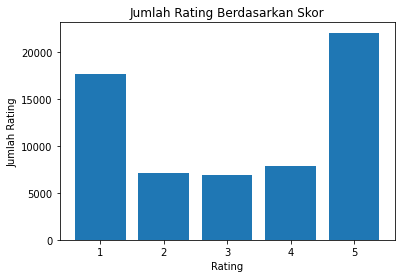

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV yang disimpan
dataset

# Menghitung jumlah rating untuk setiap rating
rating_counts = dataset["Rating"].value_counts()

# Membuat bar chart untuk menampilkan jumlah rating
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Jumlah Rating")
plt.title("Jumlah Rating Berdasarkan Skor")
plt.xticks(rating_counts.index)
plt.show()


In [ ]:
# Due to its bimodal distribution, use mean to categorize the sentiment into 2 classes
mean_grade = dataset.Rating.mean()

for i in range(len(dataset)):
  if dataset.Rating.values[i] <= mean_grade:
    dataset.Rating.values[i] = 0 # negative sentiment
  else:
    if dataset.Rating.values[i] > mean_grade:
      dataset.Rating.values[i] = 1 # positive sentiment

print(f"Mean grade {mean_grade}")


Mean grade 3.1559892197291943


In [ ]:
#import pandas as pd

# Membaca data dari file CSV yang disimpan
dataset

# Menghitung jumlah masing-masing rating
rating_counts = dataset['Rating'].value_counts().sort_index()

# Menampilkan jumlah masing-masing rating
for rating, count in rating_counts.items():
    print("Jumlah rating {} adalah {}".format(rating, count))


Jumlah rating 0 adalah 31657
Jumlah rating 1 adalah 29937


In [ ]:
# Printing current grade values
dataset.Rating.unique()


array([1, 0])

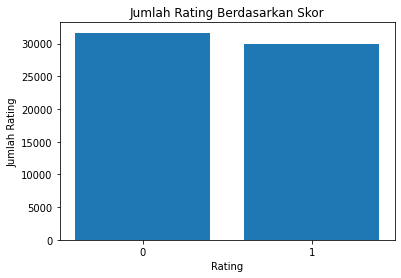

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV yang disimpan
dataset

# Menghitung jumlah rating untuk setiap rating
rating_counts = dataset["Rating"].value_counts()

# Membuat bar chart untuk menampilkan jumlah rating
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Jumlah Rating")
plt.title("Jumlah Rating Berdasarkan Skor")
plt.xticks(rating_counts.index)
plt.show()

In [ ]:
# Creating list of lists containing cleaned reviews, sentiment value, and length of the reviews
reviews_with_len = [[text, dataset['Rating'][i], 
                     len(text)]
                    for i, text in enumerate(reviews)]


In [ ]:
# Sorting reviews by text length
reviews_with_len.sort(key=lambda x: x[2])


In [ ]:
# Printing certain rows of sorted list
print(reviews_with_len[1])
print(reviews_with_len[100])


[[], 0, 0]
[[3733], 1, 1]


In [ ]:
# Removing the length attribute from the list
sorted_reviews_labels = [(review_lab[0], review_lab[1])
                          for review_lab in reviews_with_len]


In [ ]:
# Printing certain rows of current sorted list
print(sorted_reviews_labels[1])
print(sorted_reviews_labels[100])


([], 0)
([3733], 1)


In [ ]:
# Converting the list to tensorflow-compliant input dataset shape
processed_dataset = tf.data.Dataset.from_generator(
    lambda: sorted_reviews_labels, 
    output_types=(tf.int32, tf.int32))


In [ ]:
# Printing the converted list
print(processed_dataset)

<FlatMapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>


In [ ]:
# Setting batch size for training
BATCH_SIZE = 32


In [ ]:
# Applying pad to dataset
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
# Printing the current shape of the dataset
print(batched_dataset)

<PaddedBatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
# Printing the first batch to see how the padding works

next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 1), dtype=int32, numpy=
 array([[    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [ 2551],
        [14389],
        [ 8235],
        [14997],
        [14997],
        [14997],
        [ 4952],
        [ 2189],
        [ 6581],
        [14997],
        [ 2531],
        [ 3733],
        [ 2189],
        [14997],
        [14997],
        [11058],
        [14997],
        [ 2299],
        [ 3733],
        [14997],
        [14997],
        [14997]], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int32)>)

In [ ]:
# Setting vocab length according to the dataset
VOCAB_LENGTH = len(tokenizer.vocab)


In [ ]:
# Printing the length of vocab
print(VOCAB_LENGTH)


30522


In [ ]:
# Finding the total numbers of batches
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / 
BATCH_SIZE)


In [ ]:
# Setting 20% of the dataset to test data
TEST_BATCHES = 384


In [ ]:
# Setting 80% of the dataset to train data
TRAIN_BATCHES = 1539


In [ ]:
# Shuffling dataset
batched_dataset.shuffle(TOTAL_BATCHES)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Storing 20% of the dataset to test data
test_data = batched_dataset.take(TEST_BATCHES)


In [ ]:
# Storing 80% of the dataset to train data
train_data = batched_dataset.skip(TEST_BATCHES)

In [ ]:
# Creating RNN model
model = tf.keras.Sequential([tf.keras.layers.Embedding(30522, 200),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5), # to avoid overfitting
                             tf.keras.layers.Dense(1, activation='sigmoid')])


In [ ]:
# Compiling model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])


In [ ]:
# Training model
history = model.fit(train_data, epochs=5)


Epoch 1/5
1541/1541 [==============================] - 121s 70ms/step - loss: 0.4190 - accuracy: 0.8159
Epoch 2/5
1541/1541 [==============================] - 27s 17ms/step - loss: 0.3375 - accuracy: 0.8697
Epoch 3/5
1541/1541 [==============================] - 27s 16ms/step - loss: 0.3074 - accuracy: 0.8832
Epoch 4/5
1541/1541 [==============================] - 28s 17ms/step - loss: 0.2852 - accuracy: 0.8936
Epoch 5/5
1541/1541 [==============================] - 27s 17ms/step - loss: 0.2651 - accuracy: 0.9020


In [ ]:
# Printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         6104400   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        135680    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
# Testing model
test_loss, test_acc = model.evaluate(test_data)


384/384 [==============================] - 4s 8ms/step - loss: 0.4248 - accuracy: 0.8374


In [ ]:
# Print loss and accuracy values
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.42477479577064514
Test Accuracy: 0.83740234375


In [ ]:
# Import confusion matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Make predictions on test data
y_pred = (model.predict(test_data) > 0.5).astype("int32")

# Get true labels of test data
y_true = []
for x, y in test_data:
    y_true.extend(y.numpy())

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


384/384 [==============================] - 3s 7ms/step
Confusion Matrix:
[[2558  496]
 [1502 7732]]


384/384 [==============================] - 3s 7ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.84      0.72      3054
    Positive       0.94      0.84      0.89      9234

    accuracy                           0.84     12288
   macro avg       0.78      0.84      0.80     12288
weighted avg       0.86      0.84      0.84     12288



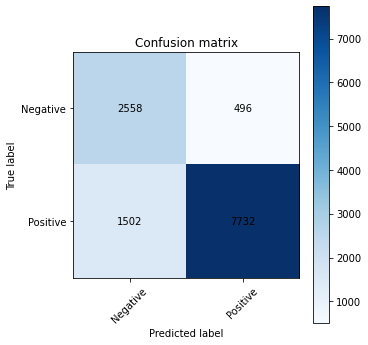

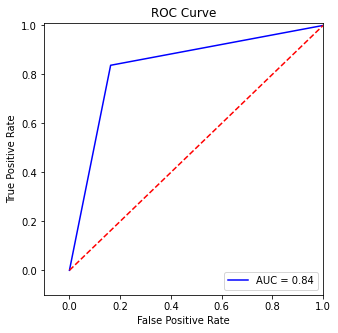

Accuracy: 0.585295041402181


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Predicting labels for test data
y_pred = (model.predict(test_data) > 0.5).astype("int32")

# Getting true labels for test data
y_true = np.concatenate([y for x, y in test_data], axis=0)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# Printing classification report with precision, recall, f1-score, and support
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

# Calculating and plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Printing accuracy
print('Accuracy:', np.mean(y_true == y_pred))


dict_keys(['loss', 'accuracy'])


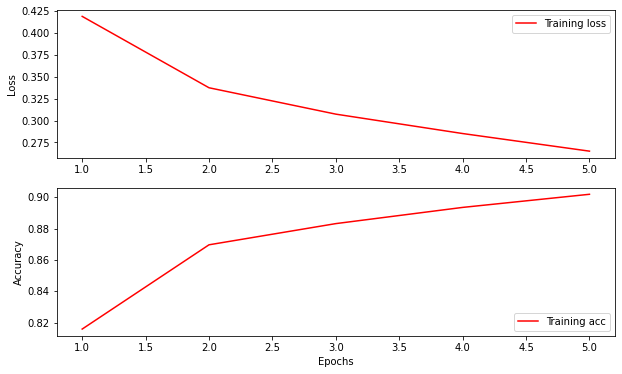

In [ ]:
# Displaying the accuracy and loss in graph
history_dict = history.history
print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['accuracy']
loss = history_dict['loss']
epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Saving model as .h5 format
saved_model_path = "modelv611.h5"
model.save(saved_model_path)


In [ ]:
# Downloading saved model to local
files.download('modelv611.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>